# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

In [2]:
# increase plot resolution
mpl.rcParams["figure.dpi"] = 200

In [3]:
# check the working directory used, should be location of this notebook
os.getcwd()

'/home/jovyan/git/rsm-mgta455-tz-gaming'

In [4]:
# loading data
tz_gaming = pd.read_pickle("data/tz_gaming.pkl")

## Part I: Logistic regression
a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory and `click_yes` as the response variable

In [5]:
tz_gaming["click_yes"] = (tz_gaming["click"] == "yes").astype(int)

In [6]:
# Logistic regression via statsmodel (using the formula API)
lr_mod_a = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=tz_gaming.query("training == 'train'")
)

###  b. Summarize and interpret the logistic regression results

Which of these explanatory variables are statistically significant? Which variables seem to be most “important”? Make sure your model evaluation includes (1) an interpretation of the odds-ratios estimated for the explanatory variables mobile_os, impua, clua, and ctrua and (2) an evaluation of the model as a whole.

In [7]:
# discuss and add any code need to calculate additional statistics you may need

lr_a = lr_mod_a.fit()
lr_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87458
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3946.1
Date:                Thu, 04 Feb 2021   Deviance:                       7892.1
Time:                        03:25:02   Pearson chi2:                 1.60e+05
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5282      0.197    -17.936      0.000      -3.914      -3.143
time_fct[T.2]         -0.4741      0.321     -1.478      0.139      -1.103       0.155
time_fct[T.3]         -0.3317      0.454     -0.730      0.466      -1.222       0.559
time_fct[T.4]        -23.5430    4.2e+04     -0.001      1.000   -8.24e+04    8.23e+04
time_fct[T.5]        -23.7205   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
time_fct[T.6]         -1.0516      1.021     -1.030      0.303      -3.053       0.950
time_fct[T.7]          0.1997      0.426      0.468      0.640      -0.636       1.036
time_fct[T.8]          0.0992      0.296      0.335      0.737      -0.481       0.679
time_fct[T.9]          0.0289      0.287      0.101      0.920      -0.534       0.592
time_fct[T.10]        -0.1866      0.295     -0.633      0.527      -0.764       0.391
time_fct[T.11]        -0.4515      0.276     -1.635      0.102      -0.993       0.090
time_fct[T.12]        -0.1351      0.280     -0.483      0.629      -0.683       0.413
time_fct[T.13]        -0.5281      0.290     -1.823      0.068      -1.096       0.040
time_fct[T.14]         0.0944      0.225      0.419      0.675      -0.347       0.536
time_fct[T.15]        -0.0140      0.225     -0.062      0.951      -0.455       0.428
time_fct[T.16]         0.0453      0.233      0.195      0.846      -0.411       0.502
time_fct[T.17]         0.0138      0.250      0.055      0.956      -0.477       0.504
time_fct[T.18]         0.0595      0.247      0.241      0.809      -0.424       0.543
time_fct[T.19]         0.2500      0.233      1.072      0.284      -0.207       0.707
time_fct[T.20]         0.2019      0.231      0.873      0.382      -0.251       0.655
time_fct[T.21]        -0.1422      0.244     -0.584      0.559      -0.620       0.335
time_fct[T.22]        -0.0302      0.238     -0.127      0.899      -0.496       0.436
time_fct[T.23]         0.0428      0.238      0.180      0.857      -0.424       0.509
time_fct[T.24]         0.0941      0.229      0.410      0.682      -0.356       0.544
app[T.app2]           -2.0905      0.229     -9.127      0.000      -2.539      -1.642
app[T.app3]           -1.6937      1.003     -1.689      0.091      -3.659       0.272
app[T.app4]           -0.9601      0.321     -2.988      0.003      -1.590      -0.330
app[T.app5]           -1.2644      1.005     -1.258      0.208      -3.234       0.705
app[T.app6]           -0.4288      0.175     -2.457      0.014      -0.771      -0.087
app[T.app7]           -0.5169      1.007     -0.513      0.608      -2.491       1.458
app[T.app8]          -24.3740   7.17e+04     -0.000      1.000   -1.41e+05     1.4e+05
app[T.app9]           -0.2899      0.236     -1.227      0.220      -0.753       0.173
app[T.app10]         -23.8906   6.71e+

In [8]:
odds_ratios = rsm.or_ci(lr_a)
odds_ratios

,index,OR,OR%,2.5%,97.5%
1,time_fct[T.2],0.622,-37.757%,0.332,1.167
2,time_fct[T.3],0.718,-28.227%,0.295,1.749
3,time_fct[T.4],0.000,-100.0%,0.000,inf
4,time_fct[T.5],0.000,-100.0%,0.000,inf
5,time_fct[T.6],0.349,-65.061%,0.047,2.586
...,...,...,...,...,...
72,mobile_os[T.ios],0.450,-55.001%,0.387,0.523
73,mobile_os[T.other],0.719,-28.097%,0.502,1.029
74,impua,0.979,-2.129%,0.975,0.982
75,clua,1.295,29.499%,1.156,1.451


<AxesSubplot:xlabel='Odds-ratio'>

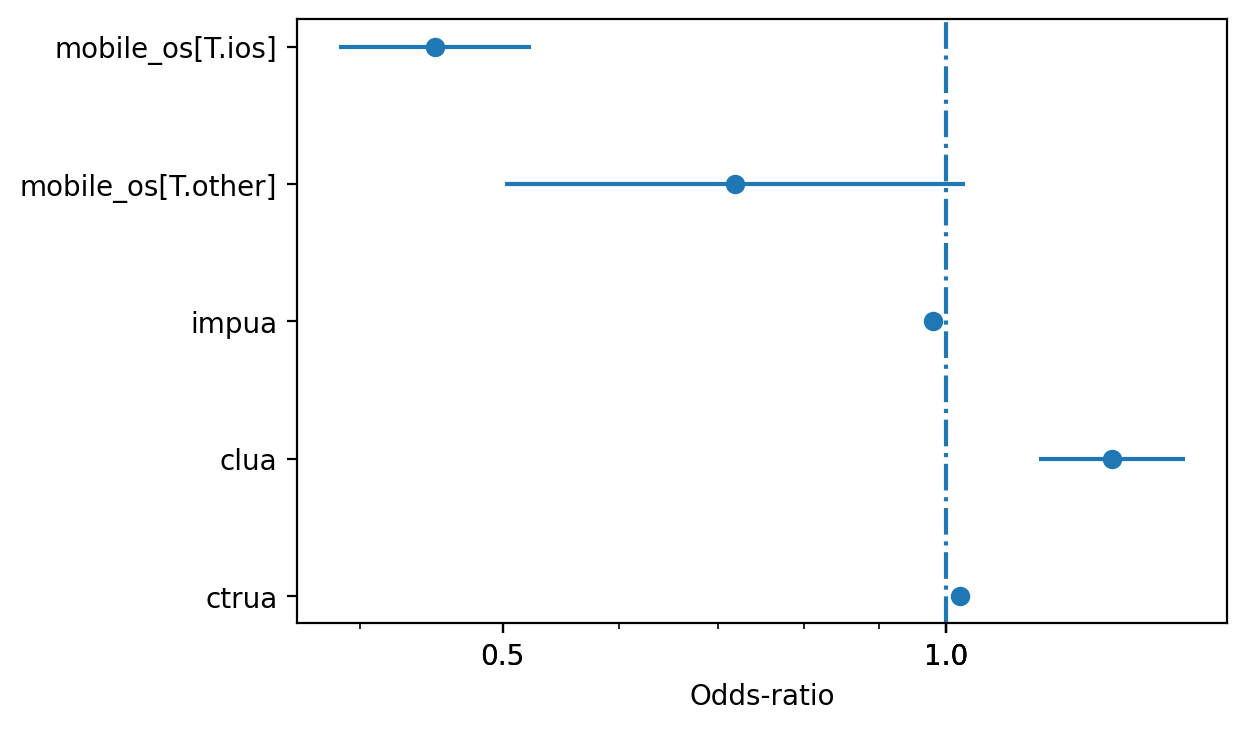

In [9]:
rsm.or_plot(lr_a, excl=['app','time_fct'])

In [10]:
rsm.model_fit(lr_a)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 159784.981 df(76), p.value < 0.001 
Nr obs: 87,535



c. Estimate a logistic regression model with `click_yes` as the response variable and `imppat`, `clpat`, and
`ctrpat` as the only explanatory variable. Make sure to standardize the explanatory variables before estimation (see example code below). What is the interpretation of the standardized odds-ratios for the explanatory variables?

In [11]:
# list all numeric variables in the data
is_num = [
    "time",
    "impup",
    "clup",
    "ctrup",
    "impua",
    "clua",
    "ctrua",
    "imput",
    "clut",
    "ctrut",
    "imppat",
    "clpat",
    "ctrpat",
]

In [12]:
# scale by (x - mean(x)) / (2 * sd(x))
scaler = preprocessing.StandardScaler()
sf = scaler.fit(tz_gaming.query("training == 'train'")[is_num])
sf.scale_ = sf.scale_ * 2
tz_std = tz_gaming.copy()
tz_std[is_num] = sf.transform(tz_std[is_num])

In [13]:
# add your code to estimate the model
lr_mod_c= smf.glm(
    formula="click_yes ~ imppat+clpat+ctrpat",
    family=Binomial(link=logit()),
    data=tz_gaming.query("training == 'train'")
)

In [14]:
lr_c = lr_mod_c.fit()

In [15]:
# disucss the results
lr_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87531
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4273.1
Date:                Thu, 04 Feb 2021   Deviance:                       8546.2
Time:                        03:25:10   Pearson chi2:                 8.16e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.4195      0.073    -74.156      0.000      -5.563      -5.276
imppat     -2.065e-05    4.3e-06     -4.802      0.000   -2.91e-05   -1.22e-05
clpat          0.0018      0.000      5.713      0.000       0.001       0.002
ctrpat         0.4793      0.034     13.933      0.000       0.412       0.547
==============================================================================
"""

In [16]:
rsm.or_ci(lr_c)

,index,OR,OR%,2.5%,97.5%
1,imppat,1.000,-0.002%,1.000,1.000
2,clpat,1.002,0.179%,1.001,1.002
3,ctrpat,1.615,61.487%,1.510,1.727


<AxesSubplot:xlabel='Odds-ratio'>

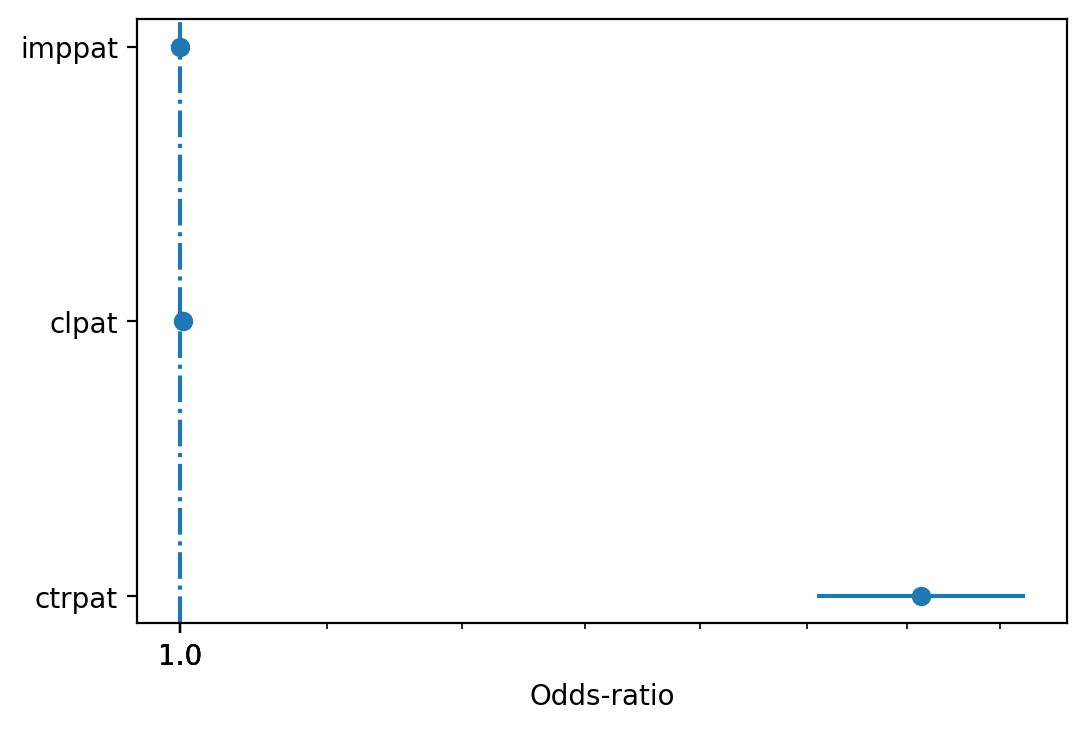

In [17]:
rsm.or_plot(lr_c)

In [18]:
rsm.model_fit(lr_c)


Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 81596.334 df(3), p.value < 0.001 
Nr obs: 87,535



d. Some of the variables in the dataset are highly correlated with each other. In particular, imppat
and clpat have a positive correlation of 0.97. Discuss the implications of this (very) high level of
collinearity and also different approaches to deal with it. What are the implications for the model and
the interpretation of the estimated (standardized) coefficients? As part of your answer, discuss the
change in the estimated (standardized) odd-ratio for imppat when you remove clpat from the model.

In [19]:
# insert your answer here
# hint: review the help for the `vif` function in the pyrsm function

rsm.vif(lr_mod_c,dec=2)

,variable,vif,Rsq
0,clpat,26.24,0.96
1,imppat,23.47,0.96
2,ctrpat,1.67,0.40


In [20]:
new_lr_mod=smf.glm(
    formula="click_yes ~ imppat+ctrpat",
    family=Binomial(link=logit()),
    data=tz_gaming.query("training == 'train'")
)

In [21]:
new_lr = new_lr_mod.fit()

In [22]:
new_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87532
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4290.9
Date:                Thu, 04 Feb 2021   Deviance:                       8581.8
Time:                        03:25:18   Pearson chi2:                 8.16e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5287      0.068    -80.814      0.000      -5.663      -5.395
imppat      3.545e-06   6.49e-07      5.460      0.000    2.27e-06    4.82e-06
ctrpat         0.5496      0.030     18.422      0.000       0.491       0.608
==============================================================================
"""

In [23]:
rsm.or_ci(new_lr)

,index,OR,OR%,2.5%,97.5%
1,imppat,1.000,0.0%,1.000,1.000
2,ctrpat,1.733,73.262%,1.634,1.837


<AxesSubplot:xlabel='Odds-ratio'>

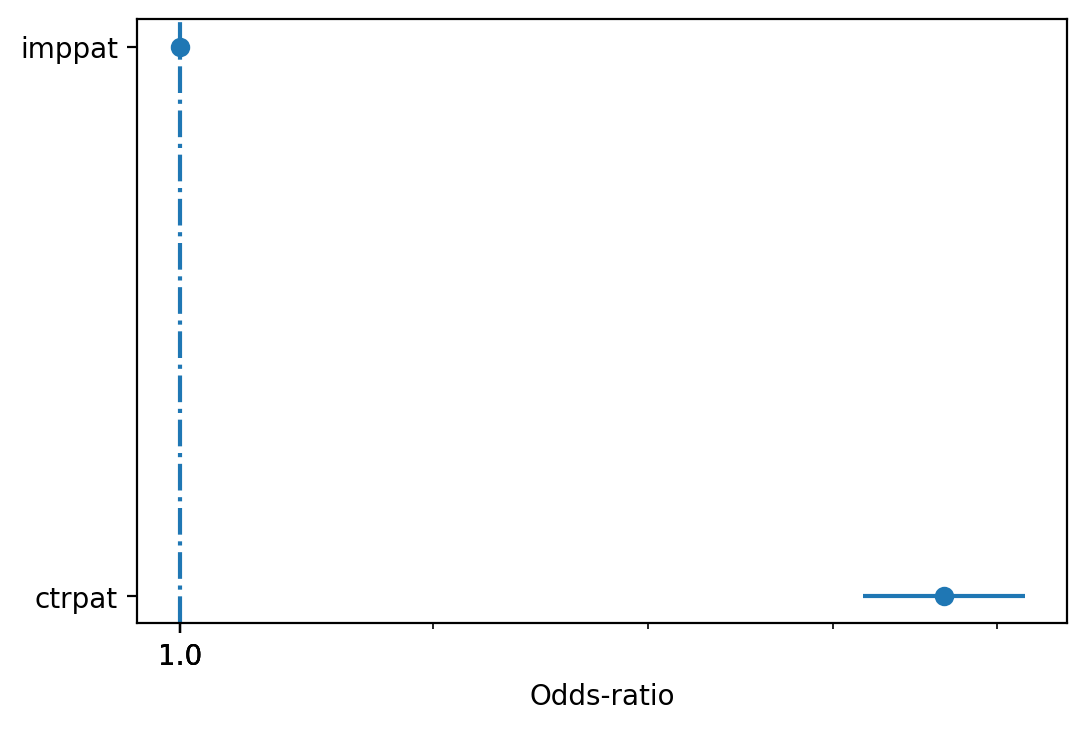

In [24]:
rsm.or_plot(new_lr)

In [25]:
rsm.model_fit(new_lr)


Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 81561.885 df(2), p.value < 0.001 
Nr obs: 87,535



e. Estimate another logistic regression model with `click_yes` as the response variable and `time_fct`,
`app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the odds ratios for `imppat`,
`clpat`, and `ctrpat` different in the two models? Please be specific and investigate beyond simply
stating the statistical problem.

In [26]:
# insert your answer here
lr_mod_e=smf.glm(
    formula="click_yes ~ time_fct+app+imppat+clpat+ctrpat",
    family=Binomial(link=logit()),
    data=tz_gaming.query("training == 'train'")
)

In [27]:
lr_e = lr_mod_e.fit()

In [28]:
lr_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87460
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4180.6
Date:                Thu, 04 Feb 2021   Deviance:                       8361.3
Time:                        03:25:30   Pearson chi2:                 8.39e+04
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.4243      0.284    -15.575      0.000      -4.981      -3.868
time_fct[T.2]     -0.5316      0.323     -1.644      0.100      -1.166       0.102
time_fct[T.3]     -0.3669      0.461     -0.795      0.426      -1.271       0.537
time_fct[T.4]    -23.8342   4.39e+04     -0.001      1.000   -8.61e+04     8.6e+04
time_fct[T.5]    -23.8601   5.72e+04     -0.000      1.000   -1.12e+05    1.12e+05
time_fct[T.6]     -1.0252      1.027     -0.999      0.318      -3.037       0.987
time_fct[T.7]      0.1986      0.438      0.453      0.650      -0.660       1.057
time_fct[T.8]      0.1270      0.309      0.411      0.681      -0.479       0.733
time_fct[T.9]      0.0606      0.299      0.203      0.839      -0.525       0.646
time_fct[T.10]    -0.1703      0.303     -0.561      0.575      -0.765       0.424
time_fct[T.11]    -0.4512      0.288     -1.565      0.118      -1.016       0.114
time_fct[T.12]    -0.1810      0.292     -0.620      0.535      -0.753       0.391
time_fct[T.13]    -0.6261      0.306     -2.047      0.041      -1.226      -0.026
time_fct[T.14]    -0.0177      0.257     -0.069      0.945      -0.522       0.487
time_fct[T.15]    -0.1738      0.272     -0.639      0.523      -0.707       0.359
time_fct[T.16]    -0.1346      0.279     -0.483      0.629      -0.681       0.412
time_fct[T.17]    -0.1458      0.296     -0.493      0.622      -0.725       0.434
time_fct[T.18]    -0.0595      0.286     -0.208      0.835      -0.619       0.500
time_fct[T.19]     0.1637      0.251      0.651      0.515      -0.329       0.656
time_fct[T.20]     0.1723      0.247      0.698      0.485      -0.311       0.656
time_fct[T.21]    -0.2455      0.261     -0.942      0.346      -0.756       0.265
time_fct[T.22]    -0.0691      0.259     -0.267      0.789      -0.576       0.438
time_fct[T.23]    -0.0066      0.268     -0.025      0.980      -0.533       0.520
time_fct[T.24]     0.1255      0.258      0.486      0.627      -0.380       0.631
app[T.app2]       -1.9965      0.351     -5.681      0.000      -2.685      -1.308
app[T.app3]       -1.6746      1.016     -1.649      0.099      -3.665       0.316
app[T.app4]       -0.7193      0.359     -2.004      0.045      -1.423      -0.016
app[T.app5]       -0.8832      1.011     -0.874      0.382      -2.864       1.098
app[T.app6]        0.0073      0.216      0.034      0.973      -0.416       0.431
app[T.app7]       -0.3460      1.019     -0.340      0.734      -2.343       1.651
app[T.app8]      -24.1102   7.27e+04     -0.000      1.000   -1.43e+05    1.42e+05
app[T.app9]       -0.0672      0.271     -0.248      0.804      -0.599       0.464
app[T.app10]     -24.0211   7.56e+04     -0.000      1.000   -1.48e+05    1.48e+05
app[T.app11]       0.3115      0.752      0.414      0.679      -1.163       1.786
app[T.app12]

In [29]:
rsm.or_ci(lr_e)

,index,OR,OR%,2.5%,97.5%
1,time_fct[T.2],0.588,-41.235%,0.312,1.108
2,time_fct[T.3],0.693,-30.714%,0.280,1.711
3,time_fct[T.4],0.000,-100.0%,0.000,inf
4,time_fct[T.5],0.000,-100.0%,0.000,inf
5,time_fct[T.6],0.359,-64.129%,0.048,2.683
...,...,...,...,...,...
70,app[T.app48],0.000,-100.0%,0.000,inf
71,app[T.app49],0.259,-74.054%,0.035,1.911
72,imppat,1.000,-0.001%,1.000,1.000
73,clpat,1.001,0.078%,0.999,1.002


<AxesSubplot:xlabel='Odds-ratio'>

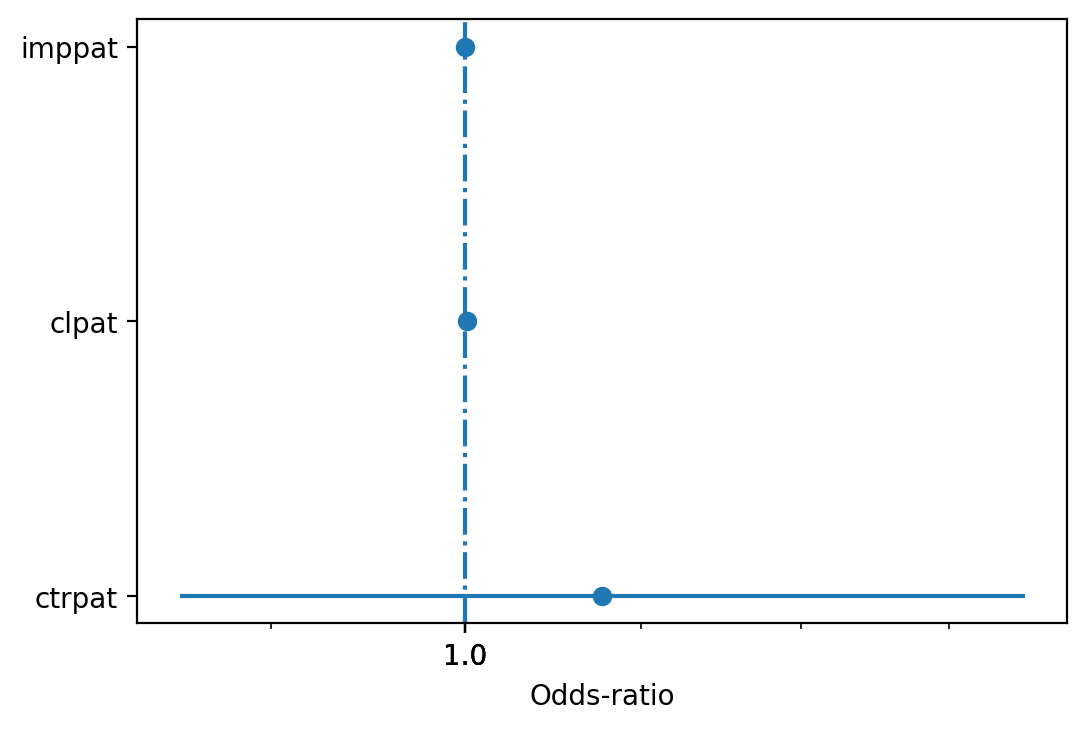

In [30]:
rsm.or_plot(lr_e, excl=['time_fct','app'])

In [31]:
rsm.model_fit(lr_e)


Pseudo R-squared (McFadden): 0.056
Pseudo R-squared (McFadden adjusted): 0.04
Log-likelihood: -4180.646, AIC: 8511.292, BIC: 9214.776
Chi-squared: 83860.128 df(74), p.value < 0.001 
Nr obs: 87,535



## Part II: Decile Analysis of Logistic Regression Results
### a. Create deciles

a. Assign each impression to a decile based on the predicted probability of click through. Create a new
variable dec_logit that captures this information. Note: The first decile should have the highest
average click-through rate. If not, make sure to “reverse” the decile numbers (i.e., 10 becomes 1, 9
becomes 2, etc.). Please use the xtile function from the pyrsm package to create the deciles

In [32]:
# insert your answer here
tz_gaming_test = tz_gaming.query('training == "test"')

tz_gaming_test['click_logit'] = lr_a.predict(tz_gaming_test)

<ipython-input-32-8041e5552470>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['click_logit'] = lr_a.predict(tz_gaming_test)


In [33]:
tz_gaming_test['dec_logit'] = rsm.xtile(tz_gaming_test['click_logit'],10, rev=True)

<ipython-input-33-d168d09e3644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['dec_logit'] = rsm.xtile(tz_gaming_test['click_logit'],10, rev=True)


b. Create a bar chart of click-through rates per decile (i.e., use dec_logit as the x-variable and ‘click_yes
as the y-variable). Note that the “click through rate” is not the same as the “predicted probability of
click.” The click through rate captures the proportion of impressions in a given group (e.g., in a decile)
that actually resulted in a click.

[Text(0, 0.5, 'Click-through rate'), Text(0.5, 0, 'Deciles')]

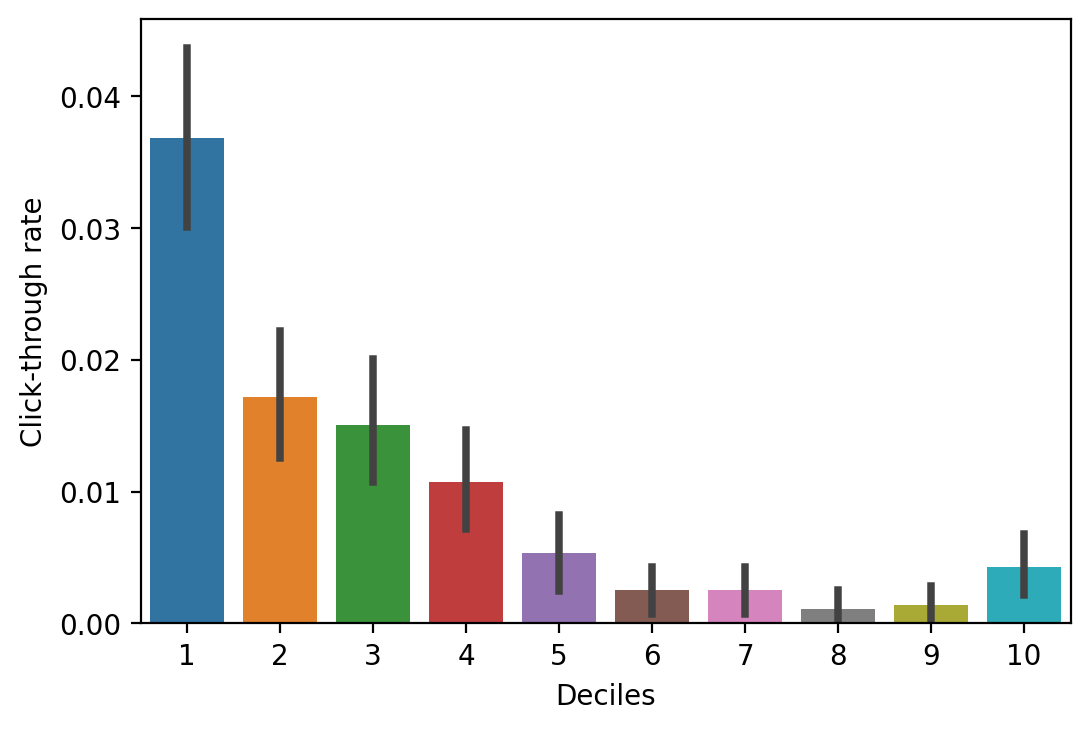

In [34]:
# insert your answer here

fig = sns.barplot(x='dec_logit',y='click_yes',data=tz_gaming_test)
fig.set(ylabel='Click-through rate', xlabel='Deciles')

c. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per
decile and save this information to a dataframe. Use the name dec_df_logit for the new data frame.

In [35]:
# insert your answer here

dec_df_logit = tz_gaming_test.groupby('dec_logit')['click_yes'].agg(['count','sum','mean']).reset_index()

In [36]:
dec_df_logit.columns = ['dec_logit','number of impressions','number of clicks','click-through rate']

## Part III: Lift and Gains

a. Use the dataframe you created in II.c above to generate a table with lift and cumulative lift numbers
for each decile

In [37]:
# insert your answer here
overall_ctr = sum(dec_df_logit['number of clicks'])/sum(dec_df_logit['number of impressions'])
tot_impressions = sum(dec_df_logit['number of impressions'])

dec_df_logit['cum number of impressions'] = dec_df_logit['number of impressions'].cumsum()
dec_df_logit['cum prop of impressions'] = dec_df_logit['cum number of impressions']/tot_impressions
dec_df_logit['cum number of clicks'] = dec_df_logit['number of clicks'].cumsum()
dec_df_logit['ctr'] = dec_df_logit['number of clicks']/dec_df_logit['number of impressions']
dec_df_logit['cum ctr'] = dec_df_logit['cum number of clicks']/dec_df_logit['cum number of impressions']
dec_df_logit['lift'] = dec_df_logit['ctr']/overall_ctr
dec_df_logit['cum lift'] = dec_df_logit['cum ctr']/overall_ctr

In [38]:
dec_df_logit[['dec_logit','lift','cum lift']]

,dec_logit,lift,cum lift
0,1,3.799786,3.799786
1,2,1.772676,2.786775
2,3,1.553873,2.376446
3,4,1.106734,2.058705
4,5,0.552182,1.756646
5,6,0.258238,1.506837
6,7,0.258423,1.328556
7,8,0.110673,1.176273
8,9,0.147565,1.061940
9,10,0.442694,1.000000


b. Use seaborn or matplotlib to create a chart showing the cumulative lift per decile. Put cumulative
lift on the Y-axis and cumulative proportion of impressions on the X-axis

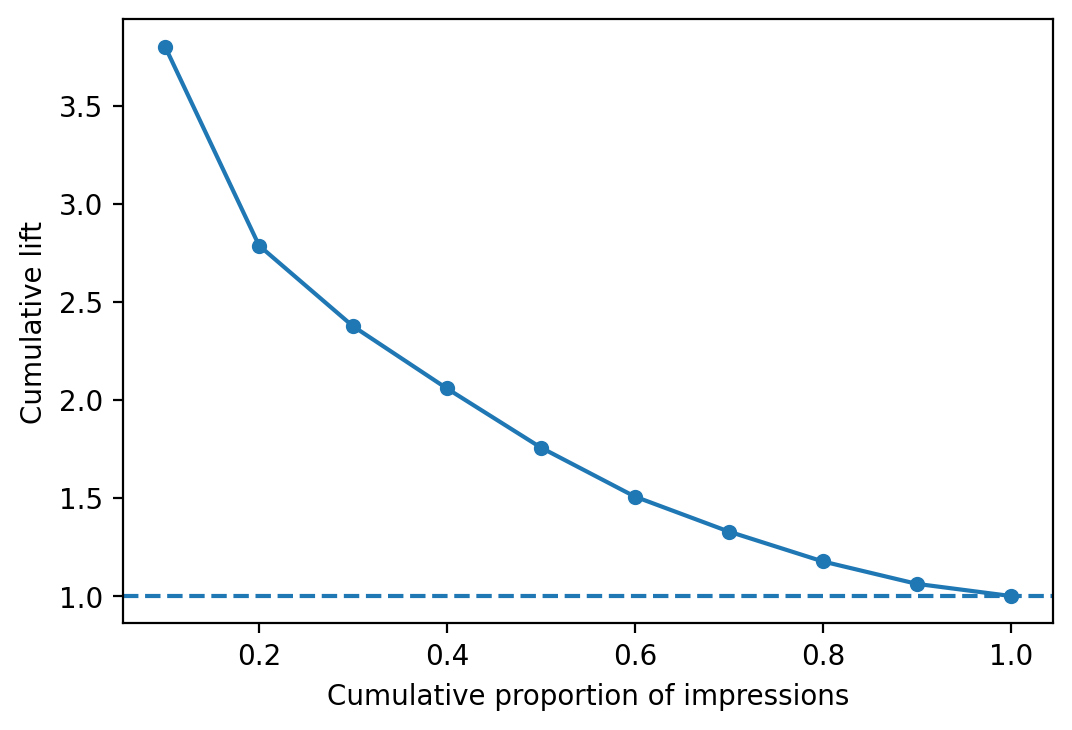

In [39]:
# insert your answer here

fig = sns.scatterplot(x='cum prop of impressions',y='cum lift',data=dec_df_logit)
fig.set(xlabel='Cumulative proportion of impressions', ylabel='Cumulative lift')
plt.plot(dec_df_logit['cum prop of impressions'], dec_df_logit['cum lift'])
plt.axhline(y=1.0, linestyle='--')

c. Use the data frame you created in II.c above to generate a table with gains and cumulative gains
numbers for each decile

In [40]:
# insert your answer here
tot_clicks = sum(dec_df_logit['number of clicks'])

dec_df_logit['gains'] = dec_df_logit['number of clicks']/tot_clicks
dec_df_logit['cum gains'] = dec_df_logit['cum number of clicks']/tot_clicks

In [41]:
dec_df_logit[['dec_logit','gains','cum gains']]

,dec_logit,gains,cum gains
0,1,0.380074,0.380074
1,2,0.177122,0.557196
2,3,0.154982,0.712177
3,4,0.110701,0.822878
4,5,0.055351,0.878229
5,6,0.025830,0.904059
6,7,0.025830,0.929889
7,8,0.011070,0.940959
8,9,0.014760,0.955720
9,10,0.044280,1.000000


d. Use seaborn or matplotlib to create a chart showing the cumulative gains per decile along with a
(diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and
cumulative proportion of impressions on the X-axis

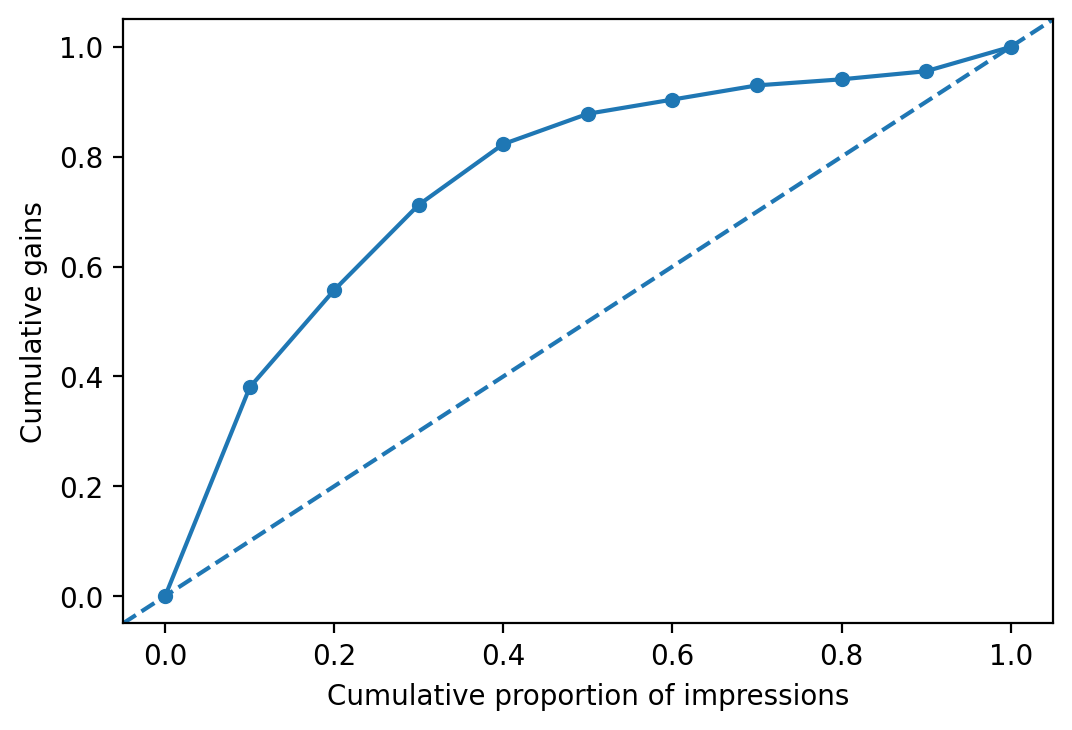

In [42]:
# insert your answer here
plot_dat = dec_df_logit[['dec_logit','cum prop of impressions','cum gains']]

new_row = pd.DataFrame({'dec_logit':0, 'cum prop of impressions':0.0, 'cum gains':0.0}, index =[0])
plot_dat = pd.concat([new_row, plot_dat]).reset_index(drop = True)

fig = sns.scatterplot(x='cum prop of impressions',y='cum gains',data=plot_dat)
fig.set(xlabel='Cumulative proportion of impressions', ylabel='Cumulative gains')
plt.plot(plot_dat['cum prop of impressions'], plot_dat['cum gains'])
plt.axline((0,0),(1,1), linestyle='--')

# Part IV: Confusion matrix

a. Create a “confusion matrix” based on the predictions from the logistic regression model you estimated
above for I.a. Again, use only data from the test set here (i.e., “training == ‘test’ ”). Use the
financial assumptions mentioned above, and repeated in section V below, to determine an appropriate
cut-off (i.e., break-even). Calculate “accuracy” based on the confusion matrix you created (see http:
//lab.rady.ucsd.edu/sawtooth/RBusinessAnalytics/logit_models.html for an example using R)
Note: Do not use any specialized packages to construct the confusion matrix

In [43]:
# insert your answer here
cost_per_impression = 10/1000
conversion = 0.05
clv = 25
profit = (conversion*clv) - (cost_per_impression)

breakeven = cost_per_impression/profit

In [44]:
tz_gaming_test['click_pred'] = (tz_gaming_test['click_logit'] > breakeven).astype(int)

<ipython-input-44-1394af7176cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['click_pred'] = (tz_gaming_test['click_logit'] > breakeven).astype(int)


In [45]:
conf_matrix = pd.crosstab(tz_gaming_test['click_pred'], tz_gaming_test['click_yes'])
conf_matrix

click_yes,0,1
click_pred,,
0,17094,50
1,10588,221


In [46]:
TN = conf_matrix.iloc[0,0]
TP = conf_matrix.iloc[1,1]
FP = conf_matrix.iloc[1,0]
FN = conf_matrix.iloc[0,1]

In [47]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f'The accuracy of the model is {round(accuracy*100,2)}%')

The accuracy of the model is 61.94%


b. Calculate a confusion matrix based on predictions from a logistic regression with click_yes as the
response variable and rnd as the only explanatory variable. As before, the model should be estimated
on training sample (i.e., “training == ‘train’ ”). Generate predictions for all rows in the data and create
the confusion matrix based only on the test set (i.e., “training == ‘test’ ”). Calculate “accuracy” based
on the confusion matrix you created.

In [48]:
# insert your answer here
lr_mod_4b = smf.glm(
    formula="click_yes ~ rnd",
    family=Binomial(link=logit()),
    data=tz_gaming.query("training == 'train'")
)

In [49]:
lr_4b = lr_mod_4b.fit()

In [50]:
tz_gaming_4b = tz_gaming

tz_gaming_4b['click_logit'] = lr_4b.predict(tz_gaming_4b[['rnd']])
tz_gaming_4b['click_pred'] = (tz_gaming_4b['click_logit'] > breakeven).astype(int)

In [51]:
tz_gaming_4b_test = tz_gaming_4b.query('training == "test"')

conf_matrix = pd.crosstab(tz_gaming_4b_test['click_pred'], tz_gaming_4b_test['click_yes'])
conf_matrix

click_yes,0,1
click_pred,,
0,137,0
1,27545,271


In [52]:
TN = conf_matrix.iloc[0,0]
TP = conf_matrix.iloc[1,1]
FP = conf_matrix.iloc[1,0]
FN = conf_matrix.iloc[0,1]

In [53]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f'The accuracy of the model is {round(accuracy*100,2)}%')

The accuracy of the model is 1.46%


c. Discuss the similarities and differences between the two confusion matrices. Which model is best, based
on the confusion matrix? Provide support for your conclusions.
4

In [54]:
# insert your answer here

d. Recalculate the confusion matrices from IV.a and IV.b using 0.5 as the cutoff. Based on these new
matrices, discuss again the similarities and differences. Which model is best based on the confusion
matrix? Provide support for your conclusions.

In [55]:
# insert your answer here
tz_gaming_test['click_pred_new'] = (tz_gaming_test['click_logit'] > 0.5).astype(int)
conf_matrix = pd.crosstab(tz_gaming_test['click_pred_new'], tz_gaming_test['click_yes'])
conf_matrix

<ipython-input-55-5c387aac561e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['click_pred_new'] = (tz_gaming_test['click_logit'] > 0.5).astype(int)


click_yes,0,1
click_pred_new,,
0,27682,271


In [56]:
TN = conf_matrix.iloc[0,0]
FN = conf_matrix.iloc[0,1]

In [57]:
accuracy = (TN)/(TN + FN)
print(f'The accuracy of the model from IV.a using a breakeven of 0.5 is {round(accuracy*100,2)}%')

The accuracy of the model from IV.a using a breakeven of 0.5 is 99.03%


In [58]:
tz_gaming_4b['click_pred_new'] = (tz_gaming_4b['click_logit'] > 0.5).astype(int)
tz_gaming_4b_test = tz_gaming_4b.query('training == "test"')

conf_matrix = pd.crosstab(tz_gaming_4b_test['click_pred_new'], tz_gaming_4b_test['click_yes'])
conf_matrix

click_yes,0,1
click_pred_new,,
0,27682,271


In [59]:
TN = conf_matrix.iloc[0,0]
FN = conf_matrix.iloc[0,1]

In [60]:
accuracy = (TN)/(TN + FN)
print(f'The accuracy of the model from IV.b using a breakeven of 0.5 is {round(accuracy*100,2)}%')

The accuracy of the model from IV.b using a breakeven of 0.5 is 99.03%


## Part V: Profitability Analysis

a. Create a new variable target_logit that is True if the predicted click-through probability is greater
than the break-even response rate you calculated in IV.a and FALSE otherwise

In [61]:
# insert your answer here
tz_gaming_test['target_logit'] = (tz_gaming_test['click_logit'] > breakeven)

<ipython-input-61-03a128c38c79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['target_logit'] = (tz_gaming_test['click_logit'] > breakeven)


b. For the test set (i.e, “training == ‘test’ ”), what is the expected profit (in dollars) and the expected
return on marketing expenditures (ROME) if TZ used (1) no targeting, (2) purchased the data from
Vneta and used the logistic regression from I.a for targeting, or (3) used Vneta’s data science consulting
services? You can use the click_vneta variable to create a target_vneta variable and calculate the
expected profit and the expected return on marketing expenditures

Note: To estimate the performance implications of “no targeting” approach use the predictions
from the model you estimated in IV.b

In [68]:
cost_per_impression = 10/1000
conversion = 0.05
clv = 25
profit = (conversion*clv) - (cost_per_impression)
dat_charge = 50000
consultation_charge = 150000

In [83]:
tz_gaming_4b_test['target_logit'] = (tz_gaming_4b_test['click_logit'] > breakeven)

<ipython-input-83-68e323be03a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_4b_test['target_logit'] = (tz_gaming_4b_test['click_logit'] > breakeven)


In [97]:
n_impressions = tz_gaming_4b_test['target_logit'].sum()
tot_cost_impressions = n_impressions*cost_per_impression

profit_nt = (profit*tz_gaming_4b_test.loc[tz_gaming_4b_test['target_logit'],'click_logit']).sum()
ROME = profit_nt/tot_cost_impressions

print(f'The expected profit for no targeting is ${round(profit_nt,2)} and the return on marketing expenditure is {round(ROME*100,2)}%')

The expected profit for no targeting is $305.06 and the return on marketing expenditure is 109.67%


In [104]:
n_impressions = tz_gaming_test['target_logit'].sum()
tot_cost_impressions = n_impressions*cost_per_impression

profit_nt = (profit*tz_gaming_test.loc[tz_gaming_test['target_logit'],'click_logit']).sum() 
ROME = profit_nt/tot_cost_impressions

print(f'The expected profit from using the logistic regression from 1.a is ${round(profit_nt,2)} and the return on marketing expenditure is {round(ROME*100,2)}%')

The expected profit from using the logistic regression from 1.a is $247.18 and the return on marketing expenditure is 228.68%


In [91]:
tz_gaming_test['target_vneta'] = (tz_gaming_test['click_vneta'] > breakeven)

<ipython-input-91-5fbbab4861e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_gaming_test['target_vneta'] = (tz_gaming_test['click_vneta'] > breakeven)


In [102]:
n_impressions = tz_gaming_test['target_vneta'].sum()
tot_cost_impressions = n_impressions*cost_per_impression

profit_nt = (profit*tz_gaming_test.loc[tz_gaming_test['target_vneta'],'click_logit']).sum() 
ROME = profit_nt/tot_cost_impressions

print(f'The expected profit from using Vneta’s data science consulting services is ${round(profit_nt,2)} and the return on marketing expenditure is {round(ROME*100,2)}%')

The expected profit from using Vneta’s data science consulting services is $93.16 and the return on marketing expenditure is 191.25%


c. Predict the profit and ROME implications for each of the 3 options if TZ purchases 20-million impression
for the upcoming ad campaign? Use the results from (b) above to project the performance
implications

Note: The currently available data (+ the click_vneta prediction) are free as part of the partnership
between Vneta and TZ-gaming. You should assume, however, that the total cost of the
data would be (50K) and that the

In [ ]:
# insert your answer here

## Part VI: Model comparison

a. The calculations in V.a through V.c above assume that the predicted probabilities are estimated
without error. Calculate the confidence interval for the predictions from the logistic regression model
shown below. Now redo the calculations from V.a through V.c, for this, adjusting for estimation errors.
How do your results change?

Create a variable `target_logit_lb` that is `True` if the predicted click-through probability is greater than the break-even response rate and `False` otherwise. Add the columns you need from the "pred" data frame to your data set

In [ ]:
lr_mod = smf.glm(
    formula="click_yes ~ mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data=,
)
lr = lr_mod.fit()
lr.summary()
pred = rsm.predict_ci(lr, , alpha = 0.1)

In [ ]:
# insert your answer here

b. You have now estimated 3 different models and also have the predictions from Vneta (see prediction
labels below). Compare the models using (1) profit calculations as in V.a through V.c and (2) a gains
chart. Discuss which of these 5 models you would recommend to put into production and why.

In [ ]:
# insert your answer here